C:\Users\daksh\AppData\Local\Temp\ipykernel_11788\2146001725.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pop[years_overlap] = df_pop[years_overlap].applymap(convert_to_numeric)
C:\Users\daksh\AppData\Local\Temp\ipykernel_11788\2146001725.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cell_phones[years_overlap] = df_cell_phones[years_overlap].applymap(convert_to_numeric)


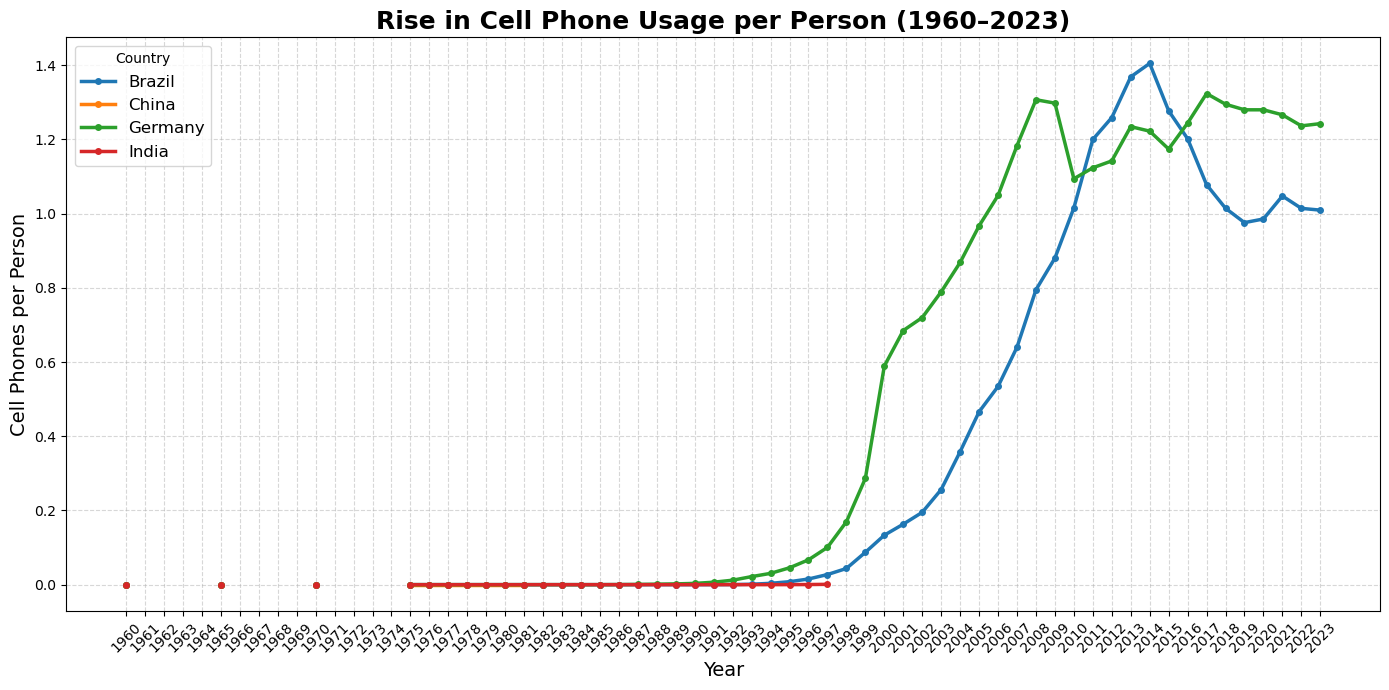

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_pop = pd.read_csv("pop.csv")
df_cell_phones = pd.read_csv("cell_phones_total.csv")
years_overlap = [str(year) for year in range(1960, 2024)]
def convert_to_numeric(value):
    if isinstance(value, str):
        multiplier = 1
        if "M" in value:
            multiplier = 1e6
        elif "k" in value:
            multiplier = 1e3
        try:
            return float(value.replace("M", "").replace("k", "")) * multiplier
        except:
            return np.nan
    return pd.to_numeric(value, errors='coerce')
df_pop[years_overlap] = df_pop[years_overlap].applymap(convert_to_numeric)
df_cell_phones[years_overlap] = df_cell_phones[years_overlap].applymap(convert_to_numeric)
df_merged = pd.merge(df_pop[['country'] + years_overlap], df_cell_phones[['country'] + years_overlap],
                     on='country', suffixes=('_pop', '_phones'))
for year in years_overlap:
    df_merged[year + "_per_person"] = df_merged[f"{year}_phones"] / df_merged[f"{year}_pop"]
selected_countries = ["United States", "India", "China", "Germany", "Brazil"]
df_plot = df_merged[df_merged["country"].isin(selected_countries)]
plt.figure(figsize=(14, 7))
for _, row in df_plot.iterrows():
    usage = [row[f"{year}_per_person"] for year in years_overlap]
    plt.plot(years_overlap, usage, label=row["country"], linewidth=2.5, marker='o', markersize=4)
plt.title("Rise in Cell Phone Usage per Person (1960–2023)", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Cell Phones per Person", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Country", fontsize=12)
plt.tight_layout()
plt.show()
